In [1]:
import spotipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from spotipy.oauth2 import SpotifyOAuth

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="4d56e8b1f0754a0ba00cd68945bd75a0",
                                                           client_secret="1c9978af70c64defb32ada84e7b1289e",
                                                            redirect_uri="http://localhost:8000",
                                                            scope="user-library-read"))



In [2]:
offset = 0
items = []
ids = []
names = []
songs = []  

while True:
    content = sp.current_user_saved_tracks(limit=50, offset=offset)
    songs += content['items']
    if content['next'] is not None:
        offset += 100
    else:
        break

In [3]:
index = 0
audio_features = []
for i in songs:
    ids.append(i['track']['id'])
while index < len(ids):
    audio_features += sp.audio_features(ids[index:index + 50])
    index += 50
    
features_list = []
for features in audio_features:
    features_list.append([features['energy'], features['liveness'],
                          features['speechiness'], features['danceability'], 
                          features['valence'], features['uri']])

df = pd.DataFrame(features_list, columns=['energy', 'liveness',
                                           'speechiness', 'danceability',
                                              'valence', 'uri'])

df.to_csv('data/audio_features.csv', index=False)

In [4]:
for index, row in df.iterrows():
    print(index)
    uri = row['uri']
    track = sp.track(uri)
    artist_uri = track['album']['artists'][0]['uri']
    artist = sp.artist(artist_uri)    
    genres = artist['genres']
    print(genres)
    str_genres = ' '.join([str(elem) for elem in genres])
    row['genre'] = str_genres
    df.loc[index, 'genre'] = row['genre']

0
['nova mpb', 'pop lgbtq+ brasileira']
1
[]
2
['pop rap']
3
['tropical house', 'uk contemporary r&b']
4
['mpb', 'nova mpb', 'pop nacional']
5
['k-pop girl group']
6
['dance pop', 'pop', 'pop dance', 'pop rap']
7
['boy band', 'dance pop', 'pop', 'pop dance', 'pop rock', 'post-teen pop']
8
['alternative metal', 'nu metal', 'post-grunge', 'rap metal']
9
['boy band', 'dance pop', 'pop', 'pop dance', 'pop rock', 'post-teen pop']
10
[]
11
['pop', 'pop rock']
12
['soft rock', 'sunshine pop']
13
['funk carioca', 'funk pop', 'pagode baiano', 'pop nacional']
14
['j-dance']
15
['social media pop']
16
['indie poptimism', 'modern alternative rock', 'modern rock', 'pop']
17
['dance pop', 'latin', 'latin pop', 'latin viral pop', 'pop', 'post-teen pop', 'rap latina', 'reggaeton', 'trap latino']
18
[]
19
['metropopolis', 'modern rock', 'pop', 'pop rock']
20
['dance pop', 'edm', 'electro house', 'electronic trap', 'pop', 'pop dance', 'pop rap']
21
['batidao romantico']
22
['otacore']
23
['alternative m

[]
149
['modern alternative rock', 'rebel blues']
150
['noise']
151
['pop emo']
152
['epicore']
153
['gymcore', 'modern alternative rock', 'post-screamo']
154
['christian alternative rock', 'christian rock']
155
['alternative metal', 'future rock']
156
['christian rock', 'gymcore', 'hard alternative', 'post-screamo']
157
['christian alternative rock', 'christian rock', 'gothic alternative', 'pixie', 'pop emo', 'slayer']
158
['gymcore', 'heavy alternative', 'post-screamo']
159
['otacore', 'pony']
160
['gymcore', 'modern alternative rock']
161
[]
162
['anthem worship']
163
['dance pop', 'pop', 'pop dance', 'post-teen pop']
164
['big room', 'dance pop', 'edm', 'electro house', 'pop', 'pop dance', 'progressive electro house', 'tropical house']
165
['edm', 'pop', 'pop dance', 'tropical house']
166
['dance pop', 'pop', 'pop dance', 'uk pop']
167
['dance pop', 'pop', 'pop dance', 'pop rock', 'post-teen pop']
168
['rebel blues']
169
['modern alternative rock']
170
['otacore', 'viral pop']
171


In [5]:
print(df.head())
df.to_csv('data/final_audio_features.csv', index=False)

   energy  liveness  speechiness  danceability  valence  \
0   0.821    0.0462       0.1750         0.527    0.648   
1   0.524    0.2410       0.0287         0.733    0.316   
2   0.391    0.1370       0.0845         0.843    0.496   
3   0.650    0.0905       0.0306         0.772    0.262   
4   0.563    0.1090       0.0945         0.546    0.897   

                                    uri                               genre  
0  spotify:track:15iXQM0NqJJCWcpeNmrWsh      nova mpb pop lgbtq+ brasileira  
1  spotify:track:4qBMiRsJjtm1WR4KyAQqrX                                      
2  spotify:track:51Fjme0JiitpyXKuyQiCDo                             pop rap  
3  spotify:track:3wPPWcVuinAU7dXcJXtCID  tropical house uk contemporary r&b  
4  spotify:track:2DsZ6pXK1AG6emFugTeYW3           mpb nova mpb pop nacional  


In [57]:
df = pd.read_csv("data/final_audio_features.csv")
df1 = pd.read_csv("data/final_audio_features.csv")
df1.drop(['uri', 'genre'], axis=1, inplace=True)

In [58]:
from sklearn import preprocessing
x = df1.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled, columns=['energy', 'liveness', 'danceability', 'speechiness', 'valence'])
df1.head()

,energy,liveness,danceability,speechiness,valence
0,0.817568,0.004561,0.275442,0.506934,0.653801
1,0.504376,0.221270,0.005715,0.751096,0.296850
2,0.364125,0.105573,0.108591,0.881474,0.490377
3,0.637246,0.053844,0.009218,0.797321,0.238792
4,0.545502,0.074424,0.127028,0.529454,0.921514


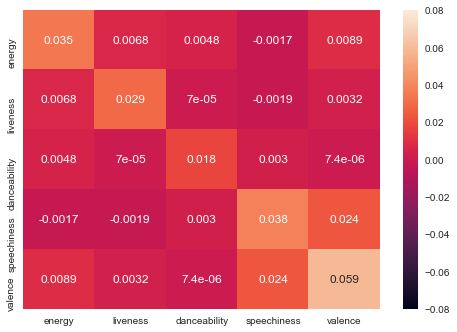

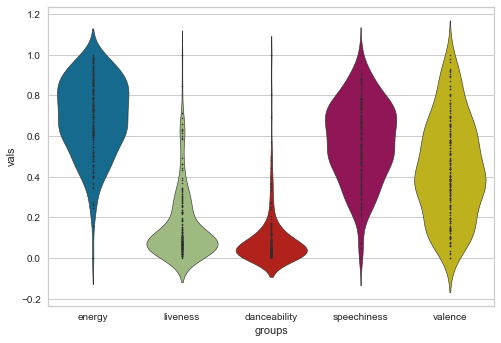

In [59]:
import seaborn as sns
ax = sns.heatmap(df1.cov(),vmin=-0.08, vmax=0.08, annot = True)
plt.show()

df2 = df1.melt(var_name='groups', value_name='vals')
ax = sns.violinplot(x="groups", y="vals", data=df2, linewidth = 0.6, inner = 'point', scale= 'width')
plt.show()

In [60]:
from itertools import permutations

columns=['energy', 'liveness', 'danceability', 'speechiness', 'valence']

perm = permutations(columns, 3)
output = set(map(lambda x: tuple(sorted(x)),perm))
a=[]
column_names = ["features", "score", "elbow"]
df3 = pd.DataFrame(columns = column_names)

                      features     score elbow
0           [energy, liveness]  0.448721     3
1     [danceability, liveness]  0.452739     3
2       [danceability, energy]  0.414700     3
3           [energy, liveness]  0.448721     3
4  [danceability, speechiness]  0.507313     3
5      [liveness, speechiness]  0.610425     3
6       [danceability, energy]  0.414700     3
7        [energy, speechiness]  0.484094     5
8     [danceability, liveness]  0.452739     3
9       [danceability, energy]  0.414700     3


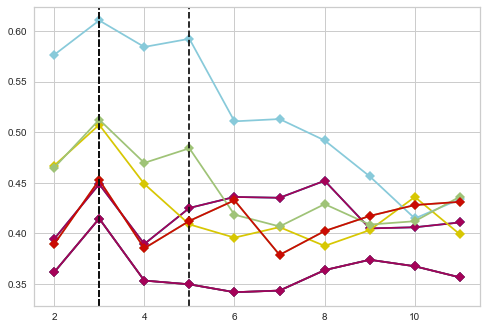

In [61]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

for i in list(output):
    df1 = df[[i[0], i[1]]]
    x = df1.values  # returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)

    model = KMeans(random_state=0)
    visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
    visualizer.fit(x_scaled)
    score = visualizer.elbow_score_
    value = visualizer.elbow_value_
    if score>0.4:
        # visualizer.show()
        idx = df1.columns
        mylist = idx.tolist()
        dict = {
            "features": mylist,
            "score": score,
            "elbow": value
        }
        df3 = df3.append(dict, ignore_index=True)

print(df3)

In [62]:
df3.sort_values(by='score')

,features,score,elbow
2,"[danceability, energy]",0.414700,3
6,"[danceability, energy]",0.414700,3
9,"[danceability, energy]",0.414700,3
0,"[energy, liveness]",0.448721,3
3,"[energy, liveness]",0.448721,3
1,"[danceability, liveness]",0.452739,3
8,"[danceability, liveness]",0.452739,3
7,"[energy, speechiness]",0.484094,5
4,"[danceability, speechiness]",0.507313,3
5,"[liveness, speechiness]",0.610425,3


In [63]:
df1 = df[['energy','valence']]

x = df1.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled2 = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled2)

In [65]:
import plotly.express as px
kmeans = KMeans(init="k-means++",
                n_clusters=9,
                random_state=15,
                max_iter = 500).fit(x_scaled2)
df1['kmeans'] = kmeans.labels_
df1.columns = ['energy', 'valence','kmeans' ]


kmeans = df1['kmeans']
df['kmeans'] = kmeans

fig = px.scatter_3d(df, x='energy', y='speechiness', z='valence',
              color='kmeans')
fig.show()

In [51]:
df1

,liveness,speechiness,kmeans
0,0.004561,0.275442,3
1,0.221270,0.005715,8
2,0.105573,0.108591,2
3,0.053844,0.009218,0
4,0.074424,0.127028,2
...,...,...,...
195,0.084437,0.031158,0
196,0.053065,0.060103,0
197,0.019357,0.013274,0
198,0.302481,0.089417,8


In [52]:
c0 = df[df1['kmeans']==0]
c1 = df[df1['kmeans']==1]
c2 = df[df1['kmeans']==2]
c3 = df[df1['kmeans']==3]
# c4 = df[df1['kmeans']==4]
# c5 = df[df1['kmeans']==5]
# c6 = df[df1['kmeans']==6]
# c7 = df[df1['kmeans']==7]
# c8 = df[df1['kmeans']==8]

clusters = []
clusters.append(c0)
clusters.append(c1)
clusters.append(c2)
clusters.append(c3)
# clusters.append(c4)
# clusters.append(c5)
# clusters.append(c6)
# clusters.append(c7)
# clusters.append(c8)

In [53]:
def getAvgValue(value, parameter):
    category = ''
    if (value < 0.25):
        category = 'Low'
    elif (value > 0.75):
        category = 'High'
    else :
        if (value > 0.51):
            category = 'Medium High'
        elif (value < 0.49) :
            category = 'Medium Low'
        else :
            category = 'Medium'
    return category + ' ' + parameter

In [54]:
def clusterAvgData(cluster, kmeans):
    column_names = ["energy_level", "valence_level","avg_energy", "avg_valence"]
    clusterData = pd.DataFrame(columns=column_names)
    avg_energy = cluster.energy.mean()
    avg_valence = cluster.valence.mean()
    dict = {
        "energy_level": getAvgValue(avg_energy, 'Energy'),
        "valence_level": getAvgValue(avg_valence, 'Valence'),
        "avg_energy": avg_energy,
        "avg_valence": avg_valence,        
    }
    clusterData = clusterData.append(dict, ignore_index=True)
    return clusterData

In [55]:
column_names = ["energy_level", "valence_level","avg_energy", "avg_valence"]
clusterData = pd.DataFrame(columns = column_names)
i = 0
for cluster in clusters:
    data = clusterAvgData(cluster, i)
    clusterData = clusterData.append(data, ignore_index=True)
    i = i + 1

In [56]:
clusterData.sort_values(by='avg_energy', ascending=False)

,energy_level,valence_level,avg_energy,avg_valence
1,High Energy,Medium High Valence,0.782556,0.578000
3,Medium High Energy,Medium High Valence,0.723833,0.510833
2,Medium High Energy,Medium High Valence,0.707269,0.535423
0,Medium High Energy,Medium Low Valence,0.661411,0.427674


In [19]:
clusterData.to_csv('data/clusters.csv', index=False)